### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* 

A simple linear regression model uses a straight line to describe the relationship between a dependent (outcome) continuous variable and an independent variable (predictor) of any type. It uses a line of best fit to best describe the linear relationship between **two** variables (since this is a *simple* regression). The reason why it's called a *linear* model is because we're using the linear equation $y = mx + b$, but in statistics we call it $y_i= \beta_0 + \beta_1 x_i + \epsilon_i$ where $\epsilon_i$ comes from the normal distribution. 

$y_i$ is the **outcome** (dependent) variable which is what we're trying to predict or understand. $x_i$ is the **predictor** (independent) variable which is used to predict the outcome variable. $\beta_0$ is the **intercept coefficient** which represents the expected average value of the outcome when the predictor is 0 (when the line hits the y=axis). $\beta_1$ is the **slope coefficient** which quantifies the relationship between the predictor and outcome variables. It shows the average change in the outcome for each one-unit increase in the predictor. It reflects the strength and direction of the relationshup between x and y. $\epsilon_i$ is the **error** term that captures the variation in the outcome that can't be explained by the linear relationship with predictor. The world is not linear so the line of best fit may not pass through any of the data points. This means there are errors ($\epsilon$) that we can measure which are the distance between the data points in the real life and the actual linear regression, and with the error value, the regression model will draw a line that minimizes these errors. *Note that this is a theoretical model but in practice, we estimate the model parameters using observed data, resulting in a fitted model. This provides estimates for the intercept and slope coefficients based on the availanle data, and this process is called model fitting*

The simple linear regression model $y_i= \beta_0 + \beta_1 x_i + \epsilon_i$ is part of the normal distribution given that the error term is normally distributed. This means that since $y_i$ is a linear function of $\epsilon$,  any variability in $y_i$ stems from $\epsilon$ so if $\epsilon$ is normally distributed, then $y_i$ will also be normally distributed for each fixed $x_i$. So when we collect multiple pairs of $y_i$ and $x_i$, we're basically sampling from a normal distribution and the samples of $y_i$ would be a mixture of normal distributions given that $x_i$ varies.   

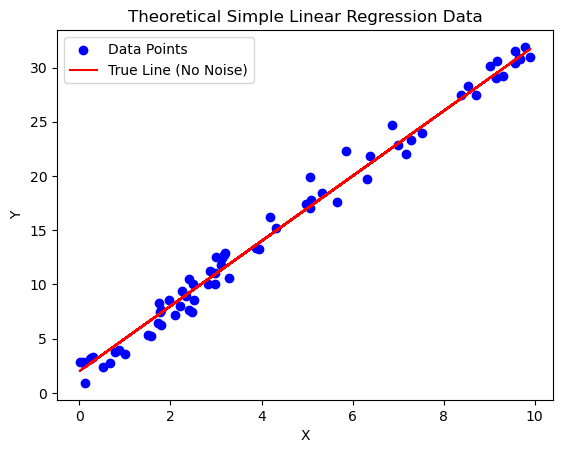

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


beta_0 = 2   # Intercept
beta_1 = 3   # Slope
sigma = 1    # Standard deviation of error term
n = 70  # Number of data points
X = np.random.rand(n) * 10  # Random values for X between 0 and 10
epsilon = np.random.normal(0, sigma, n) # Generate normally distributed errors

# Generate Y values using the linear relationship
Y = beta_0 + beta_1 * X + epsilon

# Plot the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the theoretical line without noise for reference
Y_true = beta_0 + beta_1 * X # (Theoretical line without error)
plt.plot(X, Y_true, color='red', label='True Line (No Noise)')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Theoretical Simple Linear Regression Data")
plt.legend()
plt.show()

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*

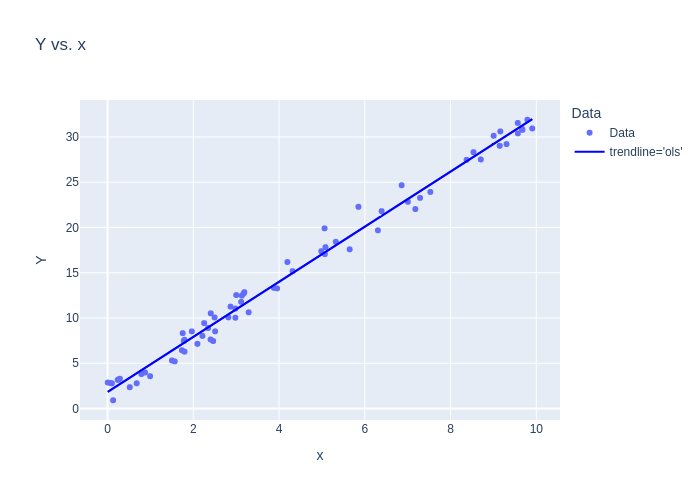

In [17]:
import pandas as pd
import statsmodels.formula.api as smf # Library used for fitting statistical models
import plotly.express as px

df = {'x': X, 'Y': Y}

# Creates the regression model where Y~x means Y depends on x
model_data_specification = smf.ols("Y~x", data=df) # ols = ordinary least squares, a type of regression model

# Fits the model to estimate the best fit slope and intercept coefficients
fitted_model = model_data_specification.fit() 

fitted_model.summary() # Provides the regression results including many summary statistics like R^2, F-stat, residuals, skew, p-value, etc.
fitted_model.summary().tables[1]  # Provides the 2nd table in .summary() showing beta coefficients, error, t-Stat, p-Value, confidence interval
fitted_model.params  # Returns the value of Y and x (the intercept and slope coefficients) 
fitted_model.params.values  # Returns the values of the coefficients in an array
fitted_model.rsquared  # Measures the proportion of variance in Y that can be explained by x (quantifies how much x and Y are related) 

# what two things does this add onto the figure?
df['Data'] = 'Data' # Adds a legend onto the plot with 'Data' referring to the data points

# Creates the scatter plot and adds a trendline from the ordinary least squares model
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Adds the trendline onto the legend
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

> Note that if your x is categorical, you would use Y~C(x) when creating your regression model 

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

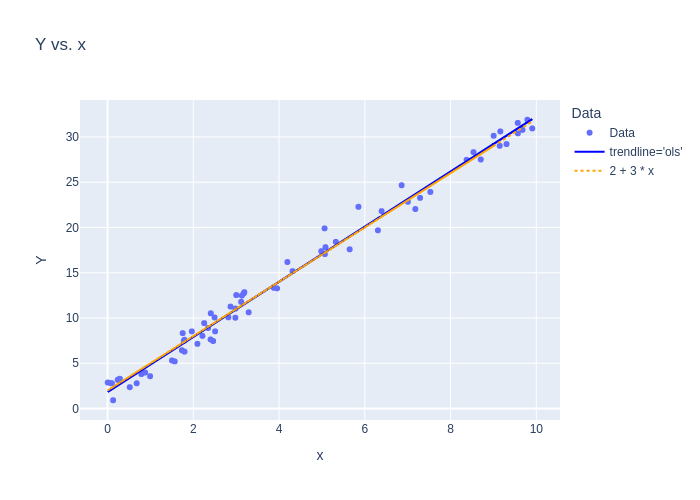

In [18]:
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.add_scatter(x=X, y=Y_true, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

Theoretical regression lines assume that the relationship between the predictor and outcome variable can be approximated by a straight line, which effectively shows their true underlying relationship. The theoretical model has unknown parameters that are to be estimated from sample data. Fitted regression lines are actually estimated from observed sample data (estimates of the true population parameters) and creates a line of best fit which minimizes the errors between each data point and the line. Since the fitted model estimates the coefficients using the sample data, then every time you repeat the random sampling process, the data points will be slightly different each time which results in the fitted model estimating a different coefficient for each sample. The varying estimations results in a slightly different fitted regression line everytime, which is due to the variance in random sampling. The theoretical line knows the true parameters so it stays in a consistent position while the fitted line approximates it.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)

The fitted values in *fitted_model.fittedvalues* is derived from the fitted linear regression model with each value representing the model's prediction of the expected average value of the outcome variable for a given predictor variable. To obtain the fitted values, the attribute must take in the estimated intercept and slope coefficients which is found in *fitted_model.params* (or *fitted_model.params.values*). By using the estimated slope and intercept coefficients, *fitted_model.fittedvalues* will plug it into the simple linear regression formula $y_i= \beta_0 + \beta_1 x_i$ and for each observed value of the predictor variable, a corresponding fitted value $y_i$ will be calculated, which is what is returned from *fitted_model.fittedvalues*.

In [19]:
# Code for reference
print(fitted_model.fittedvalues) 
print(fitted_model.params)

0     21.275787
1      9.321322
2     10.960198
3     30.947072
4     31.968355
        ...    
65    21.013873
66     2.703350
67     8.560394
68     8.683213
69    29.230947
Length: 70, dtype: float64
Intercept    1.826065
x            3.043007
dtype: float64


### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"

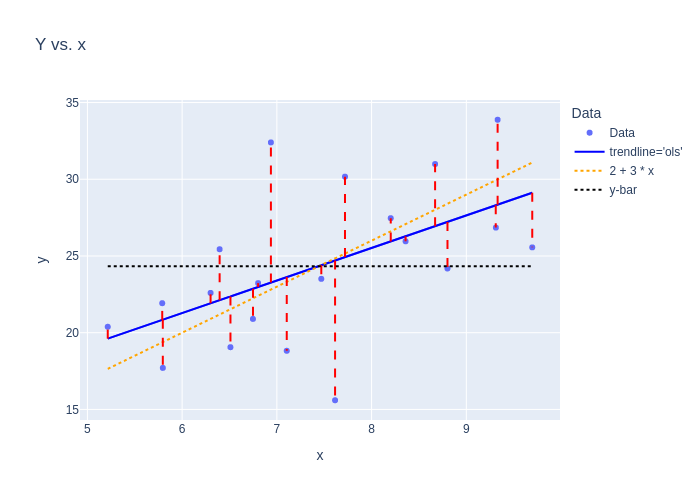

In [20]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")

The ordinary least squares method (called OLS and is done by using the code *trendline='ols* which creates an OLS trendline) is a statistical technique used for fitting linear regression models to observed data. It basically finds the 'best fit' line (values of $\beta_0$ and $\beta_1$) that minimizes the sum of the squared residuals. The reason why it's squared is the same reason why the sum of the mean differences in the standard deviation formula is squared, to ensure the positive and negatives don't cancel each other out. By squaring it, we ensure it'll always be positive. For OLS to find the best fit line, it uses the error term ($\epsilon$) to find the value between the data point and the line, and chooses a line that minimizes the sum of the squared residuals (error) between the observed values and the predicted values.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`

To break $1-((Y-fitted\_model.fittedvalues)^2).sum()/((Y-Y.mean())^2).sum()$ down, $(Y-fitted\_model.fittedvalues)^2$ is the squared difference between the theoretical Y-values and the fitted Y-values (squared so that distance isn't negative), which shows the variance between the theoretical and fitted model. Then $((Y-fitted\_model.fittedvalues)^2).sum()$ is the sum of the squared differences and which is divided by $((Y-Y.mean())^2).sum()$ which is the sum of the squared differences in the theoretical Y and it's average. All of this is subtracted from 1 which if you notice, is the formula for $R^2$. Thus, this formula can be interpreted as "the proportion of variation in Y explained by the model" since $R^2$ describes the proportion of variation in Y that can be explained by x. Then this formula would be measuring the variation in the theoretical and fitted outcomes (from the numerator) which is the variance in Y **not** explained by the model. The denominator represents the total variance in Y around its mean which indicates the overall variability in the actual Y values. Essentially, the whole fraction indicates the variation explained by the model and it shows how much of the outcome's variance is captured by the predictors and 1- gives the proportion of the total variance in Y that's explained by the model.

Then, $fitted\_model.rsquared$ can be interpreted as the accuracy of the fitted model since it calculates how much of the theoretical Y can the fitted model explain. If $R^2$ is close to 1 then the fitted model can accurately describe the theoretical Y's and is thereforce, an accurate estimated model of the true model.

In the context of linear regression, $np.corrcoef(Y,fitted\_model.fittedvalues)[0,1]^2$ calculates the correlation coefficient ($R$), which finds the correlation between the actual Y values and the fitted Y-values and squares it ($R^2$) to find the proportion of variance in Y that can be explained by the fitted model. $np.corrcoef(Y,x)[0,1]^2$ returns the proportion of variance in Y that can be explained by x, not from the fitted model but all from the true model. Notice that since $R$ is calculated first and then squared, then it's restricted to positives so basically, the squaring removes the direction and now it only shows *strength* of relationship. When you call $np.corrcoef(Y,fitted\_model.fittedvalues)$, it returns a 2x2 correlation matrix first row is $corr(Y,Y), corr(Y,fitted\_model.fittedvalues)$ and second row is $corr(fitted\_model.fittedvalues,Y), corr(fitted\_model.fittedvalues,fitted\_model.fittedvalues)$. The first element is the correlation of Y with itself which is 1 (since it's perfectly correlated to itself), second element is correlation between $Y$ and $fitted\_model.fittedvalues$ which is usually what we care about, and etc. So we want $R$ which is the correlation between $Y$ and $fitted\_model.fittedvalues$ which is at [0,1]. All in all, these are just another way of calculating $R^2$.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below

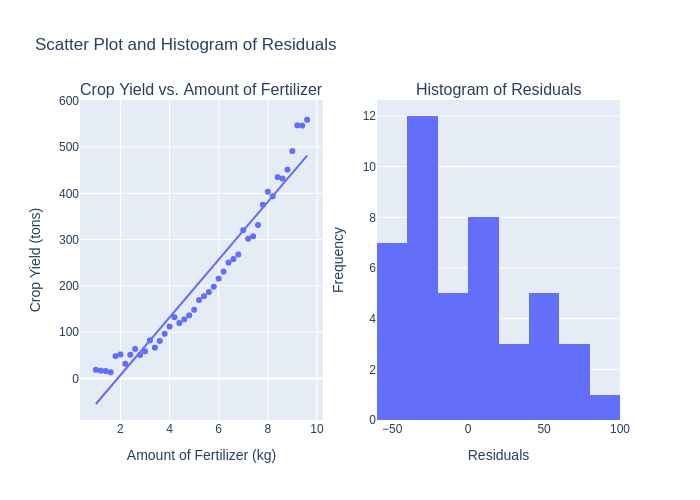

In [21]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

The assumptions for simple linear regressions are:
- **Linearity:** there is a linear relationship between the independent and dependent variable
- **Independence:** the data points are independent of each other (value of one data point shouldn't influence the other)
- **Homoscedasticity:** the variance of the residuals (differences between the true and predicted Y values) is constant across all levels of x (spread of error around the fitted regression line is rougly the same across all values of independent variables)
- **Normality of Residuals:** The residuals (errors) are normally distributed (since for valid hypothesis testing and C.I, we assume the residual follows a normal distribution)
- **No Measurement Error in Predictor Variable:** the predictor variable is assumed to be measured without error

In the example data, the histogram of residuals shows us the shape which we can see isn't a normal distribution since it's not a bell curve. This violates the normality of residuals assumption.

## "Week of Nov04" HW [due prior to the Nov08 TUT]

_**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**_

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


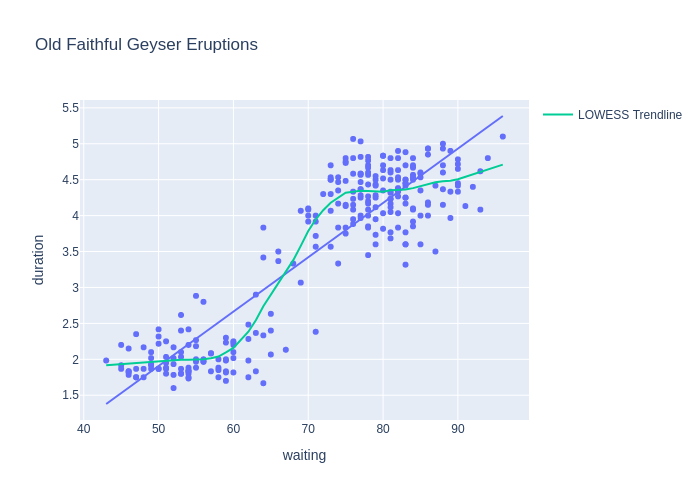

In [22]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

> The LOWESS (Locally Weighted Scatterplot Smoothing) trendline is a non-parametric method used to fit a smooth curve through a scatter plot of data points. It's useful when the relationship between the variables aren't necessarily linear but you want to capture trends in the data without assuming a specific form (like linear regression does). LOWESS fits a separate regression line to a small subset of the data at each point. The smoothed curve captures overall trend in the data, making it less sensitive to outliers and noise. LOWESS doesn't make assumptions about the relationship (unlike how linear regression assumes a linear relationship). This trendline can handle non-linear and complex relationships in data

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:06:41   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$H_0: \beta_1 = 0$

$H_A: \beta_1 \neq 0$

If the slope of the linear regression is 0, then trendline would be a horizontal line which means as the waiting time increases, the eruption duration still stays the same which shows there is no linear association (relationship is flat). If the slope wasn't 0, then as the waiting time changes, eruption duration also changes whether negative or positive. When the question asks in terms of the relevant parameter of the simple linear regression model, it means to describe the null hypothesis using the variables in $Y_i = \beta_0 + \beta_1x_i + \epsilon_i$.

From the code above, we can gather that the slope coefficient is 0.0756 which is not equal to 0. Furthermore, we have a p-value < 0.001 (notice that it says 0 but it's actually less than 0.0001 since python's floating point error displays it as 0) which tells us that the probability of getting a slope coefficient of 0.0756 given that our null hypothesis is true is basically impossible, hence the very small probability. In addition, we are given a confidence interval for the slope coefficient and since 0 is not in the interval, we have even more evidence against the null hypothesis. Therefore, from the statistics above, we have strong evidence against the null hypothesis that the change in waiting time doesn't affect the eruption duration.

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.410
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.238
Time:                        01:09:55   Log-Likelihood:                 2.3238
No. Observations:                  83   AIC:                           -0.6475
Df Residuals:                      81   BIC:                             4.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.0

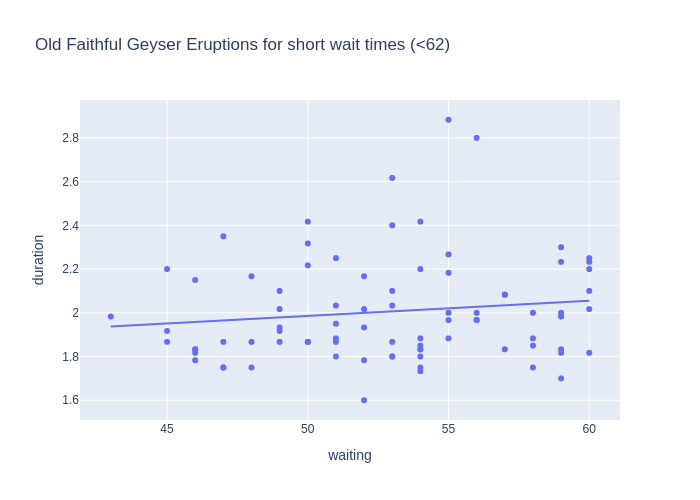

In [23]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary())#.tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


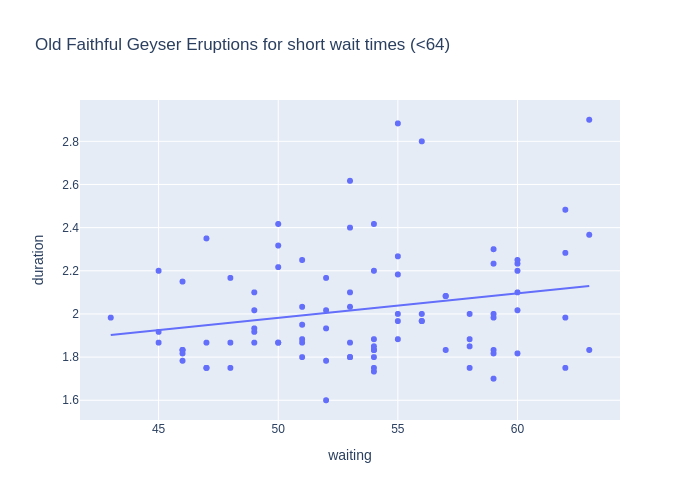

In [24]:
short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


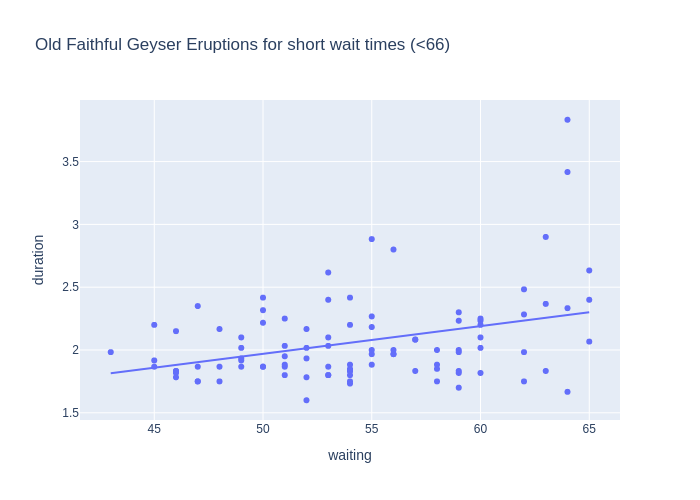

In [26]:
short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

Within the context of shorter wait times, if I comment out the code above that restricts the regression results to only the second table, I'm able to see $R^2$. I can then deduce that since 1.7% *(based on data of short_wait_times < 62)* of the variance in eruption duration can be explained by the wait time, that suggests a weak relationship compared to the full dataset where $R^2$ was 81.1%. The $R^2$ values of short_wait_times < 64 and 66 are similar, with them being 4.9% and 12.6% respectfully.

When $short\_wait\_limit<62$, we have no evidence against the null hypothesis since our associated p-value > 0.1 which from our p-value table, indicates we have no evidence against the null. Additionally, our confidence interval includes 0 which leads us to fail to negate the null hypothesis since we can't rule out the possibility that the true parameter is 0. 

When $short\_wait\_limit<64$, we have a probability of 0.036 that our slope coefficient is what it is (0.0114) given that our null hypothesis is true. From our p-value table, we see that it correlates to having moderate evidence against the null hypothesis so even though it's better than our stricter condition of $<62$, we still don't have strong evidence which implies that our null hypothesis might not be true but the evidence isn't strong enough to reject it.

When $short\_wait\_limit<66$, we have strong evidence against the null hypothesis since our p-value < 0.001 which correlates to having strong evidence against the null from the table. Although our p-value shows up as 0 in the regression results, it's actually telling us that the p-value < 0.0001 but python's floating point error displays it as 0. Moreover, since our confidence interval doesn't include 0, we have even more evidence against the null since our true parameter $\beta_1$ can't be 0.

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]'

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


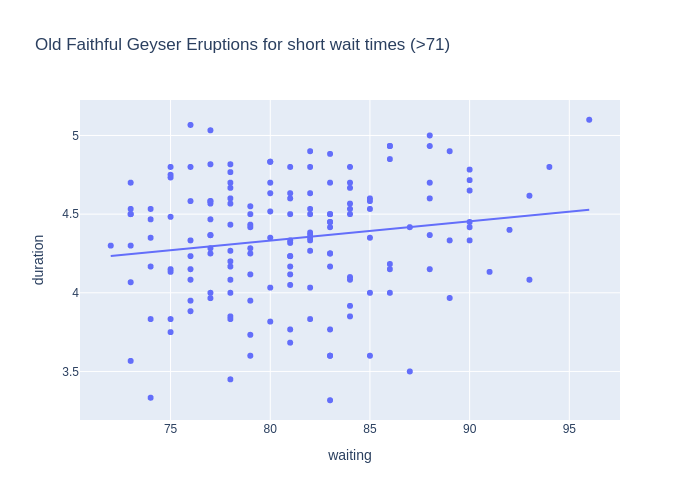

In [27]:
import plotly.express as px
import statsmodels.formula.api as smf
import numpy as np

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

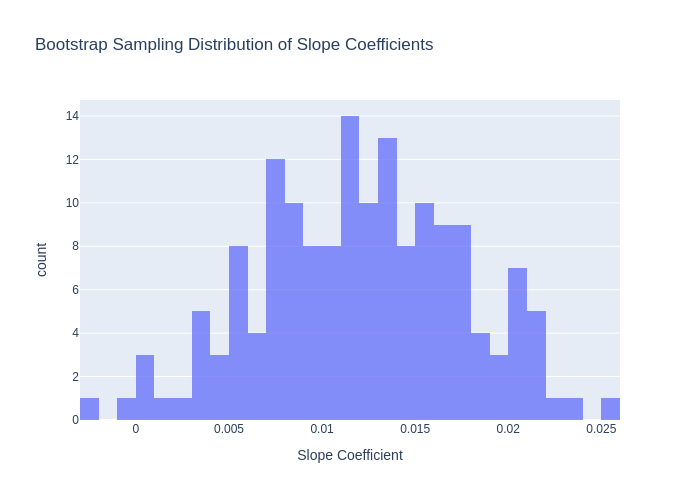

In [28]:
n_samples = 160
bs_slope_coefficients = []

# Bootstrapping the sample and fitting it to the linear regression model
# then extracting the slope coefficients and saving them for later
for _ in range(n_samples):
    bs_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols(formula='duration ~ waiting', data=bs_sample).fit()
    bs_slope_coefficients.append(model.params['waiting']) # params gives the slope and intercept coefficients

bs_slope_coefficients = np.array(bs_slope_coefficients) # Turn list into array   
slope_df = pd.DataFrame(bs_slope_coefficients, columns=["Slope"])

# Plot the bootstrapped sampling distribution
fig = px.histogram(
    slope_df,
    x="Slope",
    nbins=30,  # Adjust the number of bins as needed
    title="Bootstrap Sampling Distribution of Slope Coefficients",
    labels={"Slope": "Slope Coefficient"},
    opacity=0.75
)
fig.show(renderer="png")

C.I: [0.00069929 0.02281997]
p-value: 0.4625


/tmp/ipykernel_90/1277880126.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



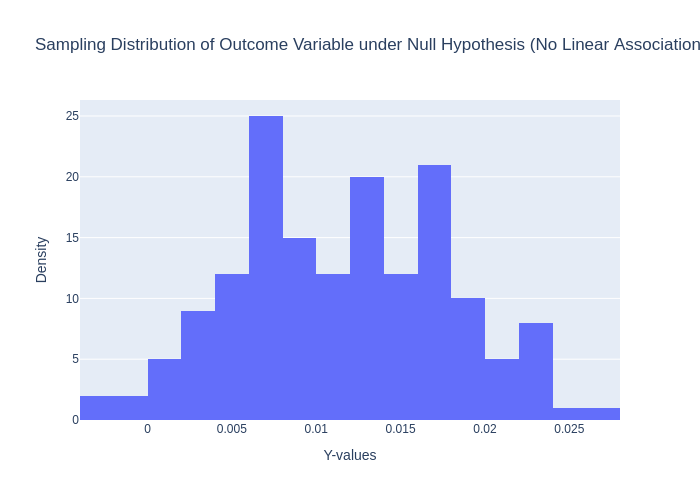

In [29]:
import pandas as pd
from scipy import stats

# Initialize an array to store the slope coefficients from each bootstrap sample
n_samples = 160  # Number of bootstrap samples
bs_slope_coefficients = []
old_faithful_simulation = old_faithful[long_wait].copy()

for _ in range(n_samples):
    bs_sample = old_faithful_simulation.sample(n=long_wait.sum(), replace=True)
    
    # Fit the linear model to the bootstrap sample
    model = smf.ols(formula='duration ~ waiting', data=bs_sample).fit()
    
    # Append the slope coefficient for 'waiting' from the fitted model
    bs_slope_coefficients.append(model.params['waiting'])

bs_slope_coefficients = np.array(bs_slope_coefficients)
print('C.I:', np.quantile(bs_slope_coefficients, [0.025, 0.975]))
print('p-value:', (np.abs(bs_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean())

slope_df = pd.DataFrame(bs_slope_coefficients, columns=["Y-values"])

fig = px.histogram(slope_df, x="Y-values", nbins=30, title="Sampling Distribution of Outcome Variable under Null Hypothesis (No Linear Association)", labels={"Slope": "Slope Coefficient"})
fig.update_layout(xaxis_title="Y-values", yaxis_title="Density")
fig.show(renderer="png")

Since the confidence interval inclues 0 and the p-value, according to the table, tells us that there is weak evidence against the null hypothesis, we can therefore conclude that we don't have enough evidence against the null hypothesis so we fail to reject it.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


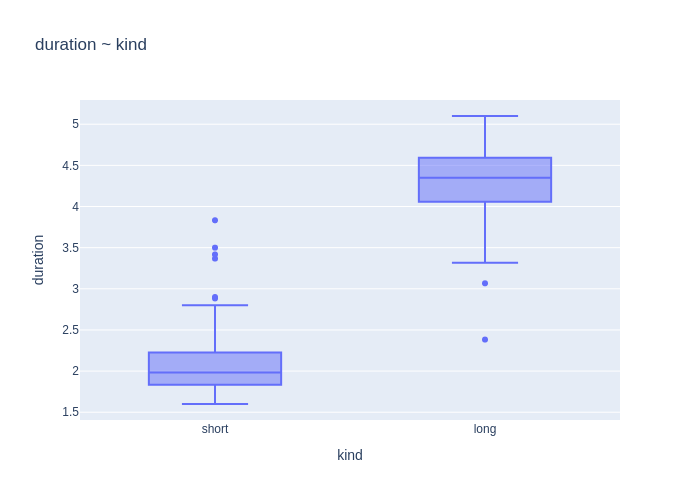

In [30]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

The previous models used continuous variables while this new graph is using a categorical predictor variable and an indicator that tells us whether each data point is short or long. In this bar chart, the categorization of the data is now in two groups of either short or long, which is different from the previous graphs where we measured continuous variables that allowed us to see distribution shapes (histograms) or linear relationships (scatterplots). This model compares the long and short wait times side by side rather than evaluating the dataset and creating graphs separately for each subset of the data that is less than 64 and greater than 71. Although this model can compare short and long wait times side by side, since it's now using a categorical variable which forces us to use a visualization like bar charts instead of historgrams, we lose the details that might've been visible in a continuous graph that was split into multiple ranges. Additionally, this model uses $\beta_{contrast}$ to tell you how much higher or lower the dependent variable is for long compared to short wait times, while the previous model's $\beta_1$ only told how the dependent variable changes with each unit increase in wait time.

$H_0:\beta_{contrast} = 0$

$H_A: \beta_{contrast}\ne0$

Our p-value for this new model is less than 0.001 which tells us that the probability of getting the $\beta_{contrast}$ that we have is next to impossible assuming the null hypothesis is true. We can also gather that the confidence interval does not include 0, which further supports the fact that we have strong evidence against the null hypothesis of no difference between the two groups.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

> Hint: Question 5 of the *Communication Activity #2* of the Oct25 TUT (addressing an *omitted* section of the TUT) discusses how the assumption in *Simple Linear Regression* that the *error* terms $\epsilon_i \sim \mathcal N\left(0, \sigma\right)$ is diagnostically assessed by evaluating distributional shape of the *residuals* $\text{e}_i = \hat \epsilon_i = Y_i - \hat y_i$


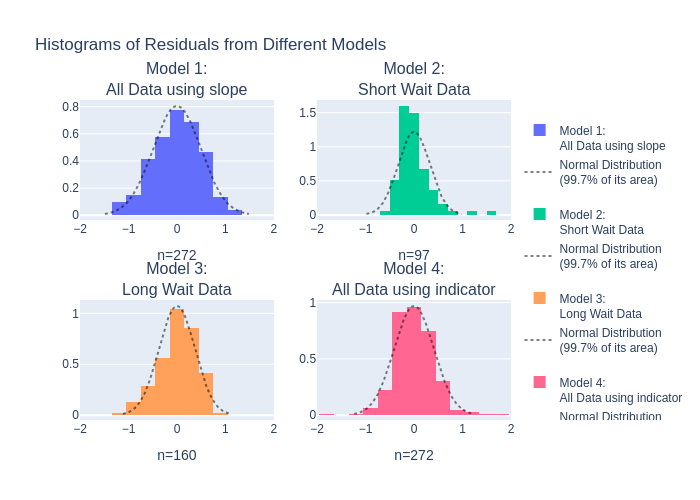

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

This question is asking which of the histograms suggests that the error term is normally distributed, which is an assumption that needs to be made to perform a simple linear regression. In a previous tutorial (and the question hint), it is said that you can tell if the errors are normal by assessing the shape of the residuals. Remember that the **error term** is used to describe the error in a true/theoretical model but called **residuals** when describing the sample/fitted model. So by assessing the estimated error distribution shape, we can tell if the true error is normally distributed.

The graphs are of the residuals from each model, so the one that looks the most like a normal distribution would imply that their error is normally distributed. The purple graph including all of the data assumes the most bell curve shape compared to the other 3, which would imply that it's error term is normally distributed. Model 2 and 4 both have a slight right skew while model 3 has a left skew, implying that since their residuals graphs are skewed and don't assume a bell curve shape, then we can assume that their errors aren't normally distributed.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 10, explaining how they're similar and different.

In [63]:
import numpy as np
import pandas as pd
# Step 1: Calculate the Observed Mean Difference
observed_mean_difference = (
    old_faithful.groupby('kind')['duration']
    .mean()
    .iloc[::-1]
    .diff()
    .values[1]
)

# Initialize variables
num_permutations = 10000
num_bootstraps = 10000
permutation_diffs = []
bootstrapped_mean_differences = []

# Separate the data into two groups for bootstrapping
short_group = old_faithful[old_faithful['kind'] == 'short']['duration']
long_group = old_faithful[old_faithful['kind'] == 'long']['duration']

# Step 2: Permutation Test (Shuffling Labels)
for i in range(num_permutations):
    # Shuffle 'kind' column labels
    shuffled_labels = old_faithful['kind'].sample(frac=1, replace=False).values
    old_faithful['kind_shuffled'] = shuffled_labels

    # Calculate the mean difference for shuffled data
    shuffled_mean_diff = (
        old_faithful.groupby('kind_shuffled')['duration']
        .mean()
        .iloc[::-1]
        .diff()
        .values[1]
    )
    
    # Append the result to permutation_diffs list
    permutation_diffs.append(shuffled_mean_diff)

# Step 3: Bootstrap Test (Subgroup Resampling)
for _ in range(num_bootstraps):
    # Resample with replacement within each group
    short_sample = short_group.sample(n=len(short_group), replace=True)
    long_sample = long_group.sample(n=len(long_group), replace=True)
    
    # Calculate the mean difference for this bootstrap sample
    boot_mean_diff = long_sample.mean() - short_sample.mean()
    bootstrapped_mean_differences.append(boot_mean_diff)

# Step 4: Calculate p-value for Permutation Test
permutation_diffs = np.array(permutation_diffs)
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_mean_difference))

# Step 5: Calculate 95% Bootstrap Confidence Interval
bootstrapped_mean_differences = np.array(bootstrapped_mean_differences)
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Output the results
print(f"Observed Mean Difference: {observed_mean_difference}")
print(f"Permutation Test p-value: {p_value}")
print(f"95% Bootstrap Confidence Interval for Mean Difference: {confidence_interval}")


Observed Mean Difference: 2.20360023255814
Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Mean Difference: [2.10278123 2.3005387 ]


A **permutation test** is a hypothesis test used to assess the evidence against a specific null hypothesis. This test revolves around the idea of label shuffling which is used to simulate samples under the assumption that the null hypothesis is true. You start with the null hypothesis and you start label shuffling. So if the null hypothesis holds, then shuffling the labels assigned to the observations shouldn't change the overall distribution of the data. This allows you to create numerous permutations of the data by randomly reassigning the group labels. For each permuted dataset, you calculate the test statistic of interest and by repeating this process many times, you generate a sampling distribution of the test statistic under the assumption that the null hypothesis is true. You then compare the observed test statistic (calculated from the original, unshuffled data) to the simulated sampling distribution.

In this case, our null hypothesis is that there is no difference in durations between short and long wait times. First, we calculate the observed difference so the difference in average wait time between short and long. Then we randomly shuffle the short and long labels assigned to each observation and recalculate the mean difference between the shuffled groups, which gives a single permuted test statistic. Then we repeat this process many times to create a distribution of permuted differences under the null hypothesis of no difference. Finally, we calculate the p-value by seeing where the observed difference falls in distribution of permuted differences. If the observed difference is extreme compared to the permuted distribution, then we have evidence against the null since the observed different is statistically significant.

The bootstrap method is a resampling technique that allows us to estimate the distribution of a statistic (like the mean difference between 2 groups) by repeatedly sampling from the obsesrved data with replacement. It's useful when you want to make inferences about a population you don't know but have a sample for. Once we repeatedly resample and create a 95% confidence interval of the mean differences, then we see if the null hypothesis of no difference (0) is within the interval and if it's not, we have evidence against the null hypothesis.

In the case below, our confidence interval doesn't include 0 and we can see that our observed mean difference isn't 0 and is actually a number within that interval which just confirms what our interval does. Additionally, our p-value is 0 so therefore we have strong evidence against the null hypothesis since the observed mean difference can't be 0 so that there is no difference. 

The difference between this method and the indicator variable method in question 11 is that the indicator model provided a direct and parametric approach to estimating and testing the difference between the groups. These methods don't rely on a parameter and instead, relies on sampling techniques to resample many times and create a distribution and interval of possible values. They all test the same hypothesis of no difference between short and long, but their approach and assumptions are different, which leads them to output something different like the indicator gives a point estimate, bootstrap gives confidence interval, and permutation test gives p-value. 

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it

Yes   

## ChatBot Links and Summaries
### Question 1-3

(https://chatgpt.com/share/672b1590-a0c0-8002-a5e7-508ad7e578f4)

1. **Linear Regression Components**:
   - We covered the basic structure of a simple linear regression model, where $Y = \beta_0 + \beta_1 X + \epsilon $, with $\beta_0$ (intercept) and $\beta_1$ (slope) as coefficients. The error term $\epsilon$,  assumed to be normally distributed, introduces randomness to the model, which implies that the dependent variable $Y$ also has a distribution.

2. **Fitting Models and Parameter Estimation**:
   - Fitting a regression model means estimating the unknown coefficients (\(\beta_0\) and \(\beta_1\)) from sample data. The `smf.ols()` function in `statsmodels.formula.api` is one way to create and fit linear models in Python, and we explored the purpose of the `.summary()` output, including standard error details.

3. **Theoretical vs. Fitted Regression Lines**:
   - Comparing the fitted regression line to a theoretical line shows how well the model estimates align with the true, underlying relationship (if known). Repeated sampling produces different fitted lines due to sampling variation, reflecting the natural fluctuations in coefficient estimates.

4. **Simulation of Sampling Variation**:
   - We discussed how simulation can demonstrate sampling variation, helping to visualize how sample estimates (like mean or regression coefficients) fluctuate due to random sampling. This approach can also illustrate the distribution and spread of an estimator.

5. **Purpose of Estimating Unknown Parameters**:
   - In theoretical models, unknown parameters (like \(\beta\) coefficients) represent true population values and must be estimated from sample data. Estimating these allows us to approximate the population model and make inferences.

### Question 4-5

(https://chatgpt.com/share/672b7997-3ce8-8002-b454-20d70e99f37d)

1. **Fitted Model Components**: We discussed that, in a fitted regression model, `fitted_model.params` provides the intercept and slope, while `fitted_model.fittedvalues` gives the predicted values (without including the error). The `fittedvalues` are calculated solely from the model's estimated coefficients, whereas residuals (`fitted_model.resid`) represent the error, or difference between actual and predicted values.

2. **Ordinary Least Squares (OLS) Method**: We covered the OLS method, which aims to find the regression line by minimizing the sum of squared residuals (SSR) between observed values and predictions. This best-fit line minimizes prediction error, making it the most accurate linear approximation of the data according to the model.

3. **Fitted Line in OLS**: Finally, we discussed that the fitted line in OLS is specifically the one that minimizes the SSR, providing the best approximation of the relationship between independent and dependent variables.

### Question 6-8

(https://chatgpt.com/share/672c57fb-aad4-8002-a2fb-006e075b023c)

1. **Old Faithful Geyser Dataset**: We discussed this classic dataset, which includes measurements of waiting times between eruptions and the duration of eruptions. It’s commonly used to explore relationships between variables and demonstrate linear regression.

2. **Hypothesis Testing for Linear Regression**:
   - For testing a **linear association** in a simple linear regression model, the null hypothesis (\( H_0: \beta_1 = 0 \)) states that there is no linear relationship between the waiting time and eruption duration, meaning changes in waiting time do not affect eruption duration.
   - The **alternative hypothesis** (\( H_A: \beta_1 \neq 0 \)) suggests there is a significant linear relationship, with the direction (positive or negative) depending on the sign of the slope \(\beta_1\).

3. **Interpreting the Slope (\( \beta_1 \))**:
   - **If \(\beta_1 = 0\)**: No linear relationship exists, and eruption duration remains constant regardless of waiting time.
   - **If \(\beta_1 \neq 0\)**: A linear relationship exists, meaning eruption duration changes with waiting time (positive if \(\beta_1 > 0\), negative if \(\beta_1 < 0\)).

4. **LOWESS Trendline**:
   - The LOWESS (Locally Weighted Scatterplot Smoothing) trendline is a non-parametric, locally-weighted approach to smoothing that helps visualize trends without assuming a linear relationship.
   - It’s useful for examining general patterns in data, especially if the relationship might be nonlinear, but it doesn’t provide a hypothesis test.

5. **Using Visualizations to Check Assumptions**:
   - To check **homoscedasticity** (constant variance of residuals), we discussed using **Residuals vs. Fitted Values** or **Residuals vs. Predictor Variable** plots, rather than histograms or bar charts, which are better suited for checking normality.

### Question 9-10

(https://chatgpt.com/share/672d08d5-6370-8002-aee5-f99bf87ae76c, https://chatgpt.com/share/672d0902-19cc-8002-a60c-2b274c383b78)

1. **\( R^2 \) Interpretation**: You asked about how to interpret an \( R^2 \) value of 0.017. I explained that it means 1.7% of the variance in the dependent variable can be explained by the independent variable(s), indicating a weak relationship.

2. **Null Hypothesis and Confidence Intervals**: We discussed how a confidence interval that includes zero suggests that you cannot rule out the possibility of the true parameter being zero. This means that the null hypothesis (which typically assumes no effect) cannot be rejected based on the data.

3. **Floating-Point Representation in Python**: I clarified that Python does not automatically round small floating-point values like < 0.001 to zero, but when printed, very small values may appear as zero due to formatting or scientific notation. You can handle this by using functions like `math.isclose()` for comparisons.

4. **Creating a Copy of DataFrame**: You asked about the line `old_faithful_simulation = old_faithful[long_wait].copy()`, and I confirmed it creates a copy of the `old_faithful` dataset, filtered by the `long_wait` condition.

5. **Linear Regression with Bootstrapping**: I provided a step-by-step explanation of how to perform a simple linear regression on bootstrapped samples. This involves generating bootstrap samples, fitting a linear regression model to each sample, and analyzing the resulting parameter estimates (intercept and slope) to understand their variability.
---
1. **Simulating Data Under Null Hypothesis**: You are simulating data under the assumption of no linear association (i.e., \( \beta_1 = 0 \)), where you simulate the `duration` variable as:
   \[
   \text{duration} = 1.65 + 0 \cdot \text{waiting} + \text{Noise}
   \]
   The noise follows a normal distribution with a mean of 0 and a standard deviation of 0.37. You used the `old_faithful` dataset and filtered it based on the `long_wait` condition.

2. **Bootstrapping**: You performed bootstrapping to generate multiple samples from the simulated dataset. For each resampled dataset, you fit a simple linear regression model to estimate the slope coefficient for `waiting`. This process was repeated 160 times.

3. **Visualization of Sampling Distribution**: 
   - We discussed how to visualize the distribution of the bootstrapped slope coefficients, which represent the variability of the slope estimate under the null hypothesis of no linear association.
   - Initially, you were using `matplotlib` to plot the histogram, but later switched to using `plotly.express` for interactive visualizations. The plot displays the distribution of the slope coefficients across bootstrap samples.

4. **Code Adjustments**: I helped update your code to use your pre-simulated dataset, avoid redundant parameter definitions, and use `plotly.express` for the visualization of the bootstrapped slope coefficients.

5. **Outcome**: The result of the bootstrapping process and visualization should show a histogram of the slope coefficients centered around zero, reflecting the null hypothesis of no linear relationship between `waiting` and `duration`.

### Question 11-13

(https://chatgpt.com/share/672d60b8-1118-8002-ab90-84fc3776f791)

1. **Understanding the Indicator Variable Model (Question 11)**:
   - **Linear Regression Approach**: The model uses an indicator variable (1 for "long", 0 for "short") to estimate the difference between the two groups' means. The equation is:
     \[
     Y_i = \beta_{\text{intercept}} + 1[\text{"long"}](k_i) \beta_{\text{contrast}} + \epsilon_i
     \]
   - The focus is on testing the hypothesis \( H_0: \beta_{\text{contrast}} = 0 \), which would indicate no difference between the groups.
   - This model assumes normality and linear relationships in the data.

2. **Permutation Test**:
   - **Non-Parametric Method**: It involves shuffling the labels between the groups to create new datasets, calculating the difference in means for each shuffle, and comparing the observed mean difference to the distribution of these permuted differences.
   - **Interpretation**: If the observed difference is far from the permuted differences, we reject the null hypothesis (i.e., we conclude there’s a significant difference between the groups).
   - **Advantages**: No assumptions about the data distribution, but computationally intensive.

3. **Bootstrap Confidence Interval**:
   - **Non-Parametric Resampling**: This method resamples data within each group (with replacement) to create new bootstrap samples, and then calculates the mean difference for each sample.
   - **Confidence Interval**: A 95% confidence interval is constructed from these bootstrap means, showing the likely range of the true mean difference.
   - **Interpretation**: If 0 is not within the confidence interval, we reject the null hypothesis. It also provides a measure of uncertainty about the mean difference.
   - **Advantages**: Provides a confidence interval for the difference, but also computationally intensive.

4. **Comparing the Methods**:
   - **Indicator Variable Model**:
     - Parametric (assumes normality and linearity).
     - Focuses on estimating the difference in means using a regression coefficient.
     - Tests the hypothesis \( H_0: \beta_{\text{contrast}} = 0 \) using standard regression techniques (e.g., t-test).
   - **Permutation Test**:
     - Non-parametric (no assumptions about the data distribution).
     - Uses label shuffling to simulate the distribution of differences under the null hypothesis.
     - Focuses on p-values for hypothesis testing.
   - **Bootstrap Method**:
     - Non-parametric (no assumptions about data distribution).
     - Uses resampling to estimate the confidence interval for the mean difference.
     - Focuses on confidence intervals and variability in the difference between groups.

5. **Hypothesis Testing**:
   - **Permutation Test**: p-value of 0.0 indicates a highly significant difference between the groups.
   - **Bootstrap Confidence Interval**: The confidence interval for the mean difference (e.g., [2.10, 2.30]) does not include 0, indicating a significant difference.
   - Both methods suggest rejecting the null hypothesis and conclude that there is a real difference between the "short" and "long" groups.

6. **Final Thoughts**:
   - **Similarities**: All three methods aim to test whether there is a difference between the two groups and provide evidence for rejecting the null hypothesis.
   - **Differences**: The indicator variable model is parametric and provides a point estimate, while the permutation test and bootstrap method are non-parametric and focus on generating distributions (p-values and confidence intervals).
   - **Strengths & Limitations**: The model-based approach assumes normality and linearity, while the permutation and bootstrap methods make fewer assumptions but are computationally intensive.